In [1]:
import pandas as pd
import numpy as np

DATA EXPLORATION

In [2]:
df_booking=pd.read_csv(r"C:\Users\Jeevan kumar\Videos\project_data\source-code\3_project_hospitality_analysis\datasets\fact_bookings.csv")

In [3]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_booking.shape

(134590, 12)

In [5]:
df_booking.room_category.unique() #find unique room categories

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_booking.booking_platform.unique() #find unique booking platforms

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
df_booking[df_booking['booking_platform']=='direct online'] #filter bookings made through direct online platform

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
38,May012216558RT221,16558,25-04-22,1/5/2022,3/5/2022,2.0,RT2,direct online,5.0,Checked Out,12600,12600
57,May012216559RT18,16559,28-04-22,1/5/2022,3/5/2022,1.0,RT1,direct online,NaN,Cancelled,11050,4420
76,May012216559RT22,16559,28-04-22,1/5/2022,6/5/2022,2.0,RT2,direct online,3.0,Checked Out,15300,15300
...,...,...,...,...,...,...,...,...,...,...,...,...
134563,Jul312217564RT214,17564,28-07-22,31-07-22,1/8/2022,2.0,RT2,direct online,NaN,Cancelled,15300,6120
134571,Jul312217564RT33,17564,30-07-22,31-07-22,4/8/2022,3.0,RT3,direct online,NaN,Checked Out,22440,22440
134572,Jul312217564RT34,17564,7/7/2022,31-07-22,1/8/2022,1.0,RT3,direct online,1.0,Checked Out,20400,20400
134573,Jul312217564RT35,17564,31-07-22,31-07-22,1/8/2022,2.0,RT3,direct online,NaN,No Show,20400,20400


In [8]:
df_booking[df_booking['booking_platform']=='makeyourtrip'] #filter bookings made through makeyourtrip platform

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
10,May012216558RT111,16558,29-04-22,1/5/2022,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100
12,May012216558RT113,16558,26-04-22,1/5/2022,7/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100
20,May012216558RT23,16558,10/4/2022,1/5/2022,7/5/2022,1.0,RT2,makeyourtrip,NaN,Checked Out,12600,12600
28,May012216558RT211,16558,30-04-22,1/5/2022,7/5/2022,2.0,RT2,makeyourtrip,NaN,Cancelled,12600,5040
34,May012216558RT217,16558,29-04-22,1/5/2022,7/5/2022,4.0,RT2,makeyourtrip,NaN,Cancelled,15120,6048
...,...,...,...,...,...,...,...,...,...,...,...,...
134561,Jul312217564RT212,17564,31-07-22,31-07-22,2/8/2022,2.0,RT2,makeyourtrip,NaN,Cancelled,15300,6120
134566,Jul312217564RT217,17564,30-07-22,31-07-22,1/8/2022,2.0,RT2,makeyourtrip,NaN,Checked Out,15300,15300
134581,Jul312217564RT42,17564,31-07-22,31-07-22,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300


In [9]:
df_booking.booking_platform.value_counts() #count bookings by platform

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: title={'center': 'Booking Platform Distribution'}, xlabel='booking_platform'>

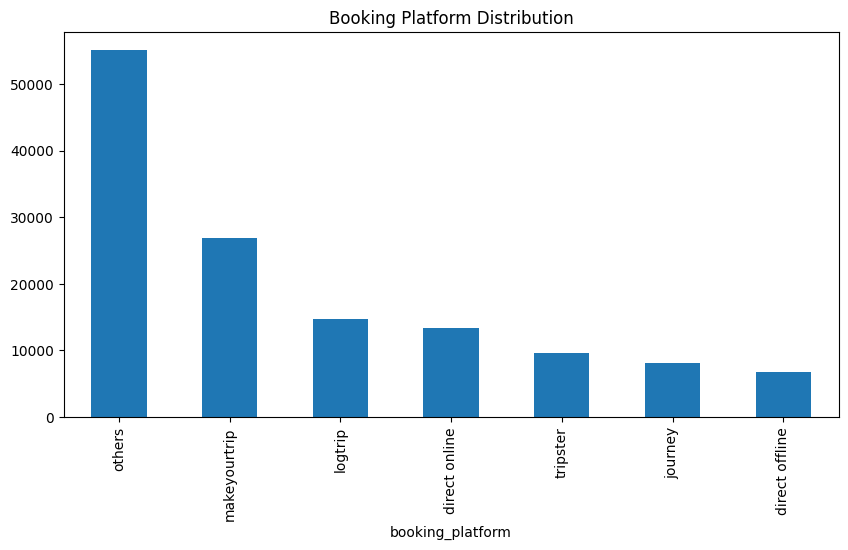

In [10]:
df_booking.booking_platform.value_counts().plot(kind='bar', figsize=(10, 5), title='Booking Platform Distribution')

In [11]:
df_booking.revenue_generated.max(), df_booking.revenue_generated.min()

(np.int64(28560000), np.int64(6500))

In [12]:
df_date=pd.read_csv(r"C:\Users\Jeevan kumar\Videos\project_data\source-code\3_project_hospitality_analysis\datasets\dim_date.csv")
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [13]:
df_hotel=pd.read_csv(r"C:\Users\Jeevan kumar\Videos\project_data\source-code\3_project_hospitality_analysis\datasets\dim_hotels.csv")
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [14]:
df_rooms=pd.read_csv(r"C:\Users\Jeevan kumar\Videos\project_data\source-code\3_project_hospitality_analysis\datasets\dim_rooms.csv")
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [15]:
df_agg_booking =pd.read_csv(r"C:\Users\Jeevan kumar\Videos\project_data\source-code\3_project_hospitality_analysis\datasets\fact_aggregated_bookings.csv")

In [16]:
df_hotel.category.value_counts(),df_hotel.property_name.value_counts()

(category
 Luxury      16
 Business     9
 Name: count, dtype: int64,
 property_name
 Atliq Grands     4
 Atliq Exotica    4
 Atliq City       4
 Atliq Blu        4
 Atliq Bay        4
 Atliq Palace     4
 Atliq Seasons    1
 Name: count, dtype: int64)

In [17]:
df_hotel.city.value_counts().sort_values() #find number of hotels in each city

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

In [18]:
df_hotel.replace('Bangalore', 'Bangaluru', inplace=True) #correcting the city name

In [19]:
df_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [20]:
df_agg_booking.property_id.unique() #find unique property IDs in aggregated bookings

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [21]:
df_agg_booking.groupby('property_id')['successful_bookings'].sum() #grouping property ID and sum successful bookings

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [22]:
df_agg_booking[df_agg_booking.successful_bookings>df_agg_booking.capacity] #find bookings where successful bookings exceed capacity

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [23]:
df_agg_booking[df_agg_booking.capacity==df_agg_booking.capacity.max()]# find property with maximum capacity

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


DATA CLEANING

In [24]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [25]:
df_booking=df_booking[df_booking.no_guests>0] 

In [26]:
df_booking.shape

(134578, 12)

In [27]:
avg,std=df_booking.revenue_generated.mean(), df_booking.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [28]:
higher_limit = avg + 3 * std
lower_limit = avg - 3 * std

In [29]:
higher_limit, lower_limit

(np.float64(294498.50173207896), np.float64(-263742.4278567056))

In [30]:
df_booking[df_booking.revenue_generated> higher_limit] #find bookings with revenue generated above the outerline

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [31]:
df_booking[df_booking.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [32]:
df_booking=df_booking[df_booking.revenue_generated<higher_limit]

In [33]:
df_booking.shape

(134573, 12)

In [34]:
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [35]:
presi=df_booking[df_booking.room_category=='RT4'] #filter bookings with room category RT4

In [36]:
presi.revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [37]:
23439.308444+3*9048.599076

50585.105672000005

In [38]:
df_booking.isnull().sum() #finding null values in bookings

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [39]:
df_agg_booking.isnull().sum()#finding null values in aggregated bookings

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [40]:
df_agg_booking[df_agg_booking.capacity.isnull()] #finding null values in capacity of aggregated bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [41]:
df_agg_booking.capacity.mean()

np.float64(25.280495759947815)

In [42]:
df_agg_booking.capacity.median()

np.float64(25.0)

In [43]:
df_agg_booking.capacity.fillna(df_agg_booking.capacity.mean(), inplace=True) #filling null values with capacity mean value

C:\Users\Jeevan kumar\AppData\Local\Temp\ipykernel_19096\2093627942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_booking.capacity.fillna(df_agg_booking.capacity.mean(), inplace=True) #filling null values with capacity mean value


In [44]:
df_agg_booking[df_agg_booking.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [45]:
df_agg_booking=df_agg_booking[df_agg_booking.successful_bookings<df_agg_booking.capacity] #removing bookings where successful bookings exceed capacity

In [46]:
df_agg_booking.shape

(9082, 5)

In [47]:
df_agg_booking.isnull().sum()#re-checking null values in aggregated bookings

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

DATA TRANSFORMATION

In [48]:
df_agg_booking.head()


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [49]:
df_agg_booking['occupancy_rate'] = (df_agg_booking['successful_bookings'] / df_agg_booking['capacity']*100).round(2)# calculating occupancy rate

In [50]:
df_agg_booking.occupancy_rate.max(), df_agg_booking.occupancy_rate.min()

(np.float64(97.73), np.float64(21.05))

In [51]:
df_agg_booking[df_agg_booking.occupancy_rate==df_agg_booking.occupancy_rate.max()]#finding occupancy rate of property with maximum occupancy

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
4141,17563,11-Jun-22,RT2,43,44.0,97.73
6341,17563,3-Jul-22,RT2,43,44.0,97.73


In [52]:
df_agg_booking[df_agg_booking.occupancy_rate==df_agg_booking.occupancy_rate.min()]#finding occupancy rate of property with minimum occupancy

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
1781,18559,18-May-22,RT4,4,19.0,21.05


In [53]:
df_agg_booking.groupby('room_category')['occupancy_rate'].mean().round(2)#grouping room category and calculating average occupancy rate

room_category
RT1    57.78
RT2    57.75
RT3    57.60
RT4    58.02
Name: occupancy_rate, dtype: float64

In [54]:
df_hotel.sample(5)

,property_id,property_name,category,city
11,17563,Atliq Palace,Business,Mumbai
4,16562,Atliq Bay,Luxury,Delhi
10,17562,Atliq Bay,Luxury,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai
17,18563,Atliq Palace,Business,Hyderabad


In [55]:
df_agg_booking.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
4795,17562,17-Jun-22,RT4,3,6.0,50.00
3094,17558,31-May-22,RT4,3,6.0,50.00
194,16563,2-May-22,RT4,12,18.0,66.67
3700,16559,7-Jun-22,RT1,20,30.0,66.67
8893,18563,28-Jul-22,RT4,8,18.0,44.44


In [56]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [57]:
df_m=pd.merge(df_agg_booking,df_rooms, left_on='room_category',right_on='room_id')# merging aggregated bookings with room details

In [58]:
df_m.groupby("room_class")['occupancy_rate'].mean()#finding average occupancy rate by room class

room_class
Elite           57.752486
Premium         57.604256
Presidential    58.017915
Standard        57.778651
Name: occupancy_rate, dtype: float64

In [59]:
df_m.groupby("room_class")['occupancy_rate'].min()#finding minimum occupancy rate by room class

room_class
Elite           27.27
Premium         23.81
Presidential    21.05
Standard        26.19
Name: occupancy_rate, dtype: float64

In [60]:
df_m.groupby("room_class")['occupancy_rate'].std()#finding standard deviation of occupancy rate by room class

room_class
Elite           14.594961
Premium         14.630228
Presidential    14.569630
Standard        14.758152
Name: occupancy_rate, dtype: float64

In [61]:
57.75+3*14.59

101.52

In [62]:
df_booking.groupby('booking_platform')['revenue_realized'].mean().round(2)# finding average revenue realized by booking platform

booking_platform
direct offline    12790.60
direct online     12632.62
journey           12648.82
logtrip           12708.87
makeyourtrip      12671.55
others            12700.58
tripster          12779.52
Name: revenue_realized, dtype: float64

In [63]:
df_m.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_id,room_class
8746,19560,28-Jul-22,RT3,8,19.0,42.11,RT3,Premium
7622,16559,17-Jul-22,RT2,28,41.0,68.29,RT2,Elite
2452,17559,25-May-22,RT4,9,14.0,64.29,RT4,Presidential
6694,18559,7-Jul-22,RT4,7,19.0,36.84,RT4,Presidential
797,19559,9-May-22,RT1,11,24.0,45.83,RT1,Standard


In [64]:
df_booking.booking_status.value_counts()# finding booking status distribution

booking_status
Checked Out    94399
Cancelled      33416
No Show         6758
Name: count, dtype: int64

In [65]:
df_booking.ratings_given.mean()# finding average ratings given by customers

np.float64(3.619045098454372)

In [66]:
df_booking.sample(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
17855,May122218558RT35,18558,8/5/2022,12/5/2022,16-05-22,2.0,RT3,others,NaN,Checked Out,12000,12000
32991,May232216558RT33,16558,18-05-22,23-05-22,25-05-22,1.0,RT3,others,4.0,Checked Out,16800,16800
100418,Jul072219563RT18,19563,6/7/2022,7/7/2022,8/7/2022,2.0,RT1,makeyourtrip,1.0,Checked Out,9750,9750
128469,Jul272218559RT48,18559,6/7/2022,27-07-22,29-07-22,2.0,RT4,journey,3.0,Checked Out,19000,19000
63714,Jun122219561RT18,19561,10/6/2022,12/6/2022,18-06-22,2.0,RT1,others,3.0,Checked Out,9750,9750


<Axes: title={'center': 'Booking Status Distribution'}, xlabel='booking_platform'>

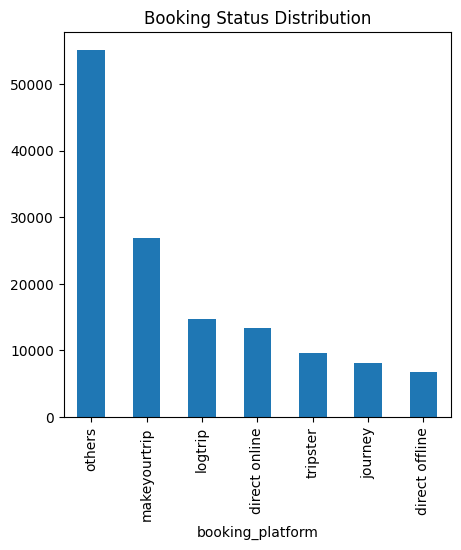

In [67]:
df_booking.booking_platform.value_counts().plot(kind='bar', figsize=(5, 5), title='Booking Status Distribution')

In [68]:
df_booking.groupby('room_category')['ratings_given'].mean().round(2) # finding average revenue realized by room category

room_category
RT1    3.63
RT2    3.60
RT3    3.59
RT4    3.69
Name: ratings_given, dtype: float64

In [69]:
df_booking.groupby('booking_platform')['ratings_given'].mean().round(2)

booking_platform
direct offline    3.62
direct online     3.61
journey           3.63
logtrip           3.62
makeyourtrip      3.62
others            3.62
tripster          3.62
Name: ratings_given, dtype: float64

In [70]:
df_m[df_m.occupancy_rate==df_m.occupancy_rate.min()]

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_id,room_class
1750,18559,18-May-22,RT4,4,19.0,21.05,RT4,Presidential


AD HOC ANALYSIS

In [71]:
df_agg_booking.sample(5) # sampling aggregated bookings data

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate
3097,19558,31-May-22,RT4,3,7.0,42.86
1038,18562,11-May-22,RT2,20,34.0,58.82
8421,18563,24-Jul-22,RT1,15,27.0,55.56
7193,18563,11-Jul-22,RT4,9,18.0,50.00
8794,16563,27-Jul-22,RT4,10,18.0,55.56


In [72]:
df_agg_booking.groupby('room_category')['occupancy_rate'].mean().round(2) # finding average occupancy rate by room category

room_category
RT1    57.78
RT2    57.75
RT3    57.60
RT4    58.02
Name: occupancy_rate, dtype: float64

In [73]:
df_cat=pd.merge(df_agg_booking, df_rooms, left_on='room_category',right_on='room_id')

In [74]:
df_cat.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_id,room_class
8551,16560,26-Jul-22,RT3,10,20.0,50.00,RT3,Premium
5726,19558,28-Jun-22,RT1,17,40.0,42.50,RT1,Standard
2901,19563,30-May-22,RT2,18,45.0,40.00,RT2,Elite
2353,18562,24-May-22,RT4,14,20.0,70.00,RT4,Presidential
5848,16562,29-Jun-22,RT2,23,43.0,53.49,RT2,Elite


In [75]:
df_cat.groupby('room_class')['occupancy_rate'].mean().round(2) 

room_class
Elite           57.75
Premium         57.60
Presidential    58.02
Standard        57.78
Name: occupancy_rate, dtype: float64

In [76]:
df_hotel.sample(5)

,property_id,property_name,category,city
14,18560,Atliq City,Business,Hyderabad
21,19561,Atliq Blu,Luxury,Bangaluru
7,17559,Atliq Exotica,Luxury,Mumbai
15,18561,Atliq Blu,Luxury,Hyderabad
0,16558,Atliq Grands,Luxury,Delhi


In [77]:
df_city=pd.merge(df_cat, df_hotel, on='property_id')

In [78]:
df_city.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_id,room_class,property_name,category,city
6064,18561,1-Jul-22,RT2,23,40.0,57.50,RT2,Elite,Atliq Blu,Luxury,Hyderabad
6676,17563,7-Jul-22,RT3,10,16.0,62.50,RT3,Premium,Atliq Palace,Business,Mumbai
1493,17564,16-May-22,RT1,5,16.0,31.25,RT1,Standard,Atliq Seasons,Business,Mumbai
7232,16560,13-Jul-22,RT2,19,34.0,55.88,RT2,Elite,Atliq City,Business,Delhi
6592,18561,6-Jul-22,RT4,6,9.0,66.67,RT4,Presidential,Atliq Blu,Luxury,Hyderabad


<Axes: title={'center': 'Average Occupancy Rate by City'}, xlabel='city'>

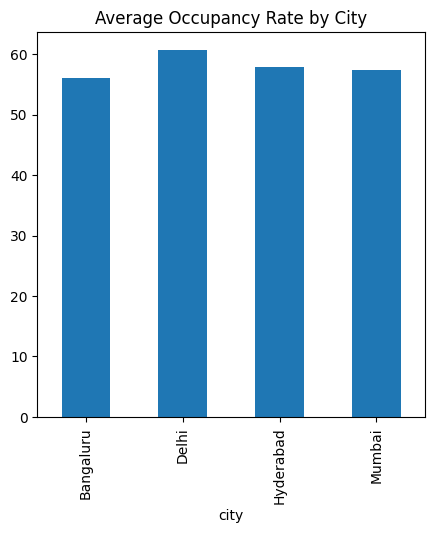

In [79]:
df_city.groupby('city')['occupancy_rate'].mean().plot(kind='bar', figsize=(5, 5), title='Average Occupancy Rate by City') # plotting average occupancy rate by city

In [80]:
df_date.sample()

,date,mmm yy,week no,day_type
64,04-Jul-22,Jul 22,W 28,weekeday


In [81]:
df_week=pd.merge(df_city, df_date, left_on='check_in_date',right_on='date') # merging city data with date data

In [82]:
df_week.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
5509,19563,22-Jul-22,RT4,2,6.0,33.33,RT4,Presidential,Atliq Palace,Business,Bangaluru,22-Jul-22,Jul 22,W 30,weekeday
712,18559,17-May-22,RT1,16,42.0,38.10,RT1,Standard,Atliq Exotica,Luxury,Hyderabad,17-May-22,May 22,W 21,weekeday
634,18559,16-May-22,RT2,15,44.0,34.09,RT2,Elite,Atliq Exotica,Luxury,Hyderabad,16-May-22,May 22,W 21,weekeday
2003,18563,30-May-22,RT2,14,29.0,48.28,RT2,Elite,Atliq Palace,Business,Hyderabad,30-May-22,May 22,W 23,weekeday
2179,19563,10-Jun-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Palace,Business,Bangaluru,10-Jun-22,Jun 22,W 24,weekeday


In [83]:
df_week.drop(columns=['date'], inplace=True) # dropping date column

<Axes: title={'center': 'Average Occupancy Rate by Day Type'}, xlabel='day_type'>

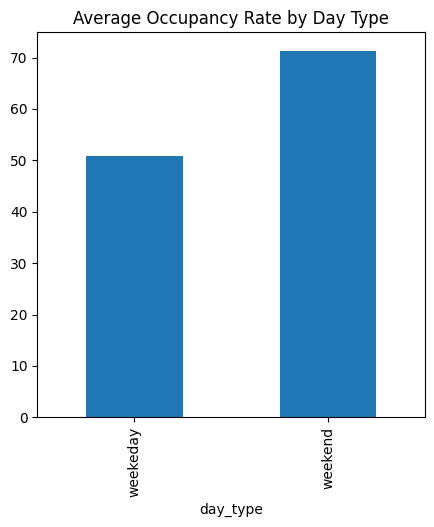

In [84]:
df_week.groupby('day_type')['occupancy_rate'].mean().plot(kind='bar', figsize=(5,5), title='Average Occupancy Rate by Day Type') # plotting average occupancy rate by day type

In [85]:
df_week['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [86]:
df_jun=df_week[df_week['mmm yy']=='Jun 22'] # filtering data for June 2022

In [87]:
df_jun.groupby('city')['occupancy_rate'].mean()

city
Bangaluru    55.998755
Delhi        61.652555
Hyderabad    58.209321
Mumbai       57.817617
Name: occupancy_rate, dtype: float64

In [88]:
df_may=df_week[df_week['mmm yy']=='May 22'] 

In [89]:
df_may.groupby('city')['occupancy_rate'].mean() 

city
Bangaluru    54.934084
Delhi        58.903403
Hyderabad    56.817048
Mumbai       56.306624
Name: occupancy_rate, dtype: float64

In [90]:
df_jul=df_week[df_week['mmm yy']=='Jul 22']

In [91]:
df_jul.groupby('city')['occupancy_rate'].mean() 

city
Bangaluru    53.812186
Delhi        58.228535
Hyderabad    54.995973
Mumbai       54.850673
Name: occupancy_rate, dtype: float64

In [92]:
df_august=pd.read_csv(r"C:\Users\Jeevan kumar\Videos\project_data\source-code\3_project_hospitality_analysis\datasets\new_data_august.csv")
df_august.city.unique() # checking unique cities in August data

array(['Mumbai', 'Bangalore'], dtype=object)

In [93]:
df_august.drop('occ%',axis=1,inplace=True) # dropping column with null values

In [94]:
df_august['occupancy_rate'] = (df_august['successful_bookings'] / df_august['capacity']*100).round(2) # calculating occupancy rate for August data

In [95]:
df_august.replace('Bangalore', 'Bangaluru', inplace=True) # correcting the city name

In [96]:
df_concating_august=pd.concat([df_week, df_august], ignore_index=True) # concatenating August data with existing weekly data

In [97]:
df_concating_august.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_id,room_class,property_name,category,city,mmm yy,week no,day_type
6425,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
6426,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential,Atliq Palace,Business,Bangaluru,Jul 22,W 32,weekend
6427,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential,Atliq Blu,Luxury,Mumbai,Jul 22,W 32,weekend
6428,16559,01-Aug-22,RT1,30,30.0,100.00,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
6429,19562,01-Aug-22,RT1,21,30.0,70.00,NaN,Standard,Atliq Bay,Luxury,Bangaluru,Aug-22,W 32,weekeday
6430,19563,01-Aug-22,RT1,23,30.0,76.67,NaN,Standard,Atliq Palace,Business,Bangaluru,Aug-22,W 32,weekeday
6431,19558,01-Aug-22,RT1,30,40.0,75.00,NaN,Standard,Atliq Grands,Luxury,Bangaluru,Aug-22,W 32,weekeday
6432,19560,01-Aug-22,RT1,20,26.0,76.92,NaN,Standard,Atliq City,Business,Bangaluru,Aug-22,W 32,weekeday
6433,17561,01-Aug-22,RT1,18,26.0,69.23,NaN,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday
6434,17564,01-Aug-22,RT1,10,16.0,62.50,NaN,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


In [98]:
df_hotel.sample()

,property_id,property_name,category,city
19,19559,Atliq Exotica,Luxury,Bangaluru


In [99]:
df_revenue_city=pd.merge(df_concating_august,df_hotel, on=['property_id','property_name','category','city']) # merging booking data with hotel data for revenue analysis
df_revenue_city.info() # checking info of merged data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          6435 non-null   int64  
 1   check_in_date        6435 non-null   object 
 2   room_category        6435 non-null   object 
 3   successful_bookings  6435 non-null   int64  
 4   capacity             6435 non-null   float64
 5   occupancy_rate       6435 non-null   float64
 6   room_id              6428 non-null   object 
 7   room_class           6435 non-null   object 
 8   property_name        6435 non-null   object 
 9   category             6435 non-null   object 
 10  city                 6435 non-null   object 
 11  mmm yy               6435 non-null   object 
 12  week no              6435 non-null   object 
 13  day_type             6435 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 704.0+ KB


In [100]:
df_revenue_city.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_rate,room_id,room_class,property_name,category,city,mmm yy,week no,day_type
5927,16560,26-Jul-22,RT4,3,7.0,42.86,RT4,Presidential,Atliq City,Business,Delhi,Jul 22,W 31,weekeday
4035,18559,28-Jun-22,RT4,8,19.0,42.11,RT4,Presidential,Atliq Exotica,Luxury,Hyderabad,Jun 22,W 27,weekeday
5257,19562,20-Jul-22,RT2,13,23.0,56.52,RT2,Elite,Atliq Bay,Luxury,Bangaluru,Jul 22,W 30,weekeday
4178,16562,30-Jun-22,RT2,19,43.0,44.19,RT2,Elite,Atliq Bay,Luxury,Delhi,Jun 22,W 27,weekeday
3369,17559,22-Jun-22,RT1,14,32.0,43.75,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Jun 22,W 26,weekeday


In [101]:
df_revenue_city.groupby('city')['occupancy_rate'].mean().round(2)

city
Bangaluru    54.95
Delhi        59.56
Hyderabad    56.65
Mumbai       56.33
Name: occupancy_rate, dtype: float64

In [102]:
df_date['date']=pd.to_datetime(df_date['date'])
df_date.sample(5)

C:\Users\Jeevan kumar\AppData\Local\Temp\ipykernel_19096\850716886.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date']=pd.to_datetime(df_date['date'])


,date,mmm yy,week no,day_type
70,2022-07-10,Jul 22,W 29,weekend
45,2022-06-15,Jun 22,W 25,weekeday
11,2022-05-12,May 22,W 20,weekeday
3,2022-05-04,May 22,W 19,weekeday
53,2022-06-23,Jun 22,W 26,weekeday


In [103]:
df_revenue_city['check_in_date'] = pd.to_datetime(df_revenue_city['check_in_date'])

C:\Users\Jeevan kumar\AppData\Local\Temp\ipykernel_19096\1404649745.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_revenue_city['check_in_date'] = pd.to_datetime(df_revenue_city['check_in_date'])


In [104]:
df_revenue_city.replace('check_in_date', 'date', inplace=True) # correcting column name

In [105]:
df_revenue_city.shape # sampling aggregated bookings data

(6435, 14)

In [106]:
df_booking.sample()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
11308,May082216562RT224,16562,8/5/2022,8/5/2022,13-05-22,4.0,RT2,direct online,3.0,Checked Out,15120,15120


In [107]:
df_merged = pd.merge(df_booking, df_revenue_city, on='property_id', how='inner')

In [117]:
df_merged.sample()

,booking_id,property_id,booking_date,check_in_date_x,checkout_date,no_guests,room_category_x,booking_platform,ratings_given,booking_status,...,capacity,occupancy_rate,room_id,room_class,property_name,category,city,mmm yy,week no,day_type
8068440,May222216563RT113,16563,22-05-22,22-05-22,23-05-22,1.0,RT1,tripster,NaN,Cancelled,...,41.0,75.61,RT1,Standard,Atliq Palace,Business,Delhi,Jun 22,W 26,weekend


In [113]:
df_merged.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date_x',
       'checkout_date', 'no_guests', 'room_category_x', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'check_in_date_y', 'room_category_y',
       'successful_bookings', 'capacity', 'occupancy_rate', 'room_id',
       'room_class', 'property_name', 'category', 'city', 'mmm yy', 'week no',
       'day_type'],
      dtype='object')

In [ ]:
df_merged.groupby('property_name')['revenue_realized'].mean().round(2)

property_name
Atliq Bay        12147.13
Atliq Blu        11960.02
Atliq City       12263.14
Atliq Exotica    13652.11
Atliq Grands     12431.92
Atliq Palace     12861.50
Atliq Seasons    16600.54
Name: revenue_realized, dtype: float64

In [ ]:
df_merged.groupby('room_class')['revenue_realized'].mean()

room_class
Elite           12691.075158
Premium         12687.453149
Presidential    12700.223198
Standard        12702.018175
Name: revenue_realized, dtype: float64

<Axes: title={'center': 'Revenue Generated by Booking Platform'}, ylabel='revenue_generated'>

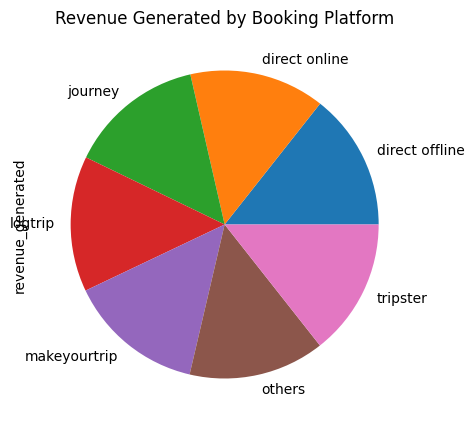

In [112]:
df_merged.groupby('booking_platform')['revenue_generated'].mean().plot(kind='pie', figsize=(5,5 ), title='Revenue Generated by Booking Platform') # plotting revenue generated by booking platform

In [ ]:
df_merged.groupby('room_class')['revenue_realized'].mean().round(2)

room_class
Elite           12691.08
Premium         12687.45
Presidential    12700.22
Standard        12702.02
Name: revenue_realized, dtype: float64

In [119]:
df_merged.shape

(34661827, 25)

In [123]:
df_merged.isnull().sum() # checking for null values in merged data

booking_id                    0
property_id                   0
booking_date                  0
check_in_date_x               0
checkout_date                 0
no_guests                     0
room_category_x               0
booking_platform              0
ratings_given          20064004
booking_status                0
revenue_generated             0
revenue_realized              0
check_in_date_y               0
room_category_y               0
successful_bookings           0
capacity                      0
occupancy_rate                0
room_id                   38075
room_class                    0
property_name                 0
category                      0
city                          0
mmm yy                        0
week no                       0
day_type                      0
dtype: int64

In [ ]:
df_merged[df_merged.room_id==df_merged.room_id.isnull()] # checking for null values in room ID

,booking_id,property_id,booking_date,check_in_date_x,checkout_date,no_guests,room_category_x,booking_platform,ratings_given,booking_status,...,capacity,occupancy_rate,room_id,room_class,property_name,category,city,mmm yy,week no,day_type
10817,May012216559RT11,16559,28-04-22,1/5/2022,3/5/2022,2.0,RT1,journey,3.0,Checked Out,...,30.0,100.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
11075,May012216559RT12,16559,29-04-22,1/5/2022,6/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,...,30.0,100.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
11333,May012216559RT13,16559,27-04-22,1/5/2022,2/5/2022,1.0,RT1,tripster,NaN,Cancelled,...,30.0,100.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
11591,May012216559RT14,16559,29-04-22,1/5/2022,3/5/2022,3.0,RT1,direct offline,5.0,Checked Out,...,30.0,100.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
11849,May012216559RT15,16559,29-04-22,1/5/2022,2/5/2022,3.0,RT1,others,5.0,Checked Out,...,30.0,100.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34660782,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,...,16.0,62.5,NaN,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday
34661043,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,...,16.0,62.5,NaN,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday
34661304,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,...,16.0,62.5,NaN,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday
34661565,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,...,16.0,62.5,NaN,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


In [125]:
df_merged.drop(columns=['room_id'], inplace=True) # dropping room ID column as it has null values

In [126]:
df_merged.isnull().sum() # re-checking null values in merged data

booking_id                    0
property_id                   0
booking_date                  0
check_in_date_x               0
checkout_date                 0
no_guests                     0
room_category_x               0
booking_platform              0
ratings_given          20064004
booking_status                0
revenue_generated             0
revenue_realized              0
check_in_date_y               0
room_category_y               0
successful_bookings           0
capacity                      0
occupancy_rate                0
room_class                    0
property_name                 0
category                      0
city                          0
mmm yy                        0
week no                       0
day_type                      0
dtype: int64